[opencv-python tutorial](http://docs.opencv.org/trunk/doc/py_tutorials/py_tutorials.html) 

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

%matplotlib inline

In [5]:
import os

In [25]:
os.path.abspath('.')

'/home/hukim/Desktop/p/tutorials/opencv-practice'

### read/write images

it is pretty safe to assume that opencv always represent images as uint8 (ubyte) ndarray

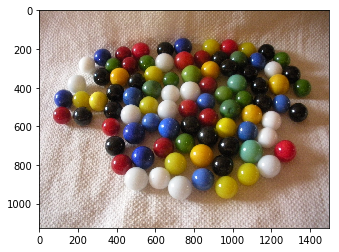

In [30]:
## RGB images - BGR to RGB
marbles = cv2.imread("public-images/marbles.jpg")[:,:,::-1]
plt.imshow(marbles)

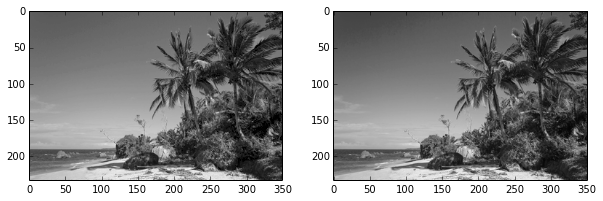

In [3]:
## gray scale - either load it directly
b,ar_gray = cv2.imread("data/images/marbles.jpg", cv2.IMREAD_GRAYSCALE)

## or convert later - note beach is RGB now
marbles_gray_converted = cv2.cvtColor(marbles, cv2.COLOR_RGB2GRAY)

## there are slight differences between the two versions
fig, axes = plt.subplots(1, 2, figsize = (10, 5))
axes[0].imshow(marbles_gray, cmap = plt.cm.gray)
axes[1].imshow(marbles_gray_converted, cmap = plt.cm.gray)

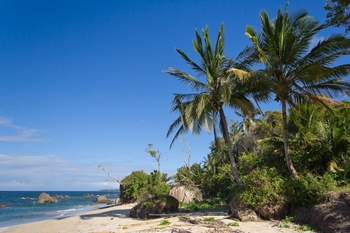

In [4]:
## save and convert to different formats - Notice it assumes BGR
cv2.imwrite("data/images/beach.jpg", beach[:,:,::-1])
Image("data/images/beach.jpg")

### read/write videos

In [5]:
## your camera
cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Display the resulting frame
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

### drawing on images

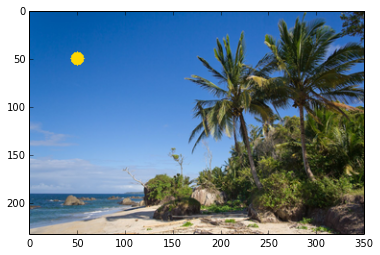

In [8]:
sunny_beach = beach.copy()
cv2.circle(sunny_beach, (50, 50), 7, color = (255, 215, 0), thickness = -1, )
plt.imshow(sunny_beach)

***NOTE THAT it seems that cv2 forces you to make a copy before you change the image***

In [21]:
## NOTE THAT it seems that cv2 forces you to make a copy before you change the image
abeach = cv2.circle(beach, (50, 50), 7, color = (255, 215, 0), thickness = -1, )
## this is fine: abeach = cv2.circle(beach.copy(), (50, 50), 7, color = (255, 215, 0), thickness = -1, )
plt.imshow(abeach)


TypeError: Layout of the output array img is incompatible with cv::Mat (step[ndims-1] != elemsize or step[1] != elemsize*nchannels)

### padding images

Sometime it is useful to pad the image border like framing pictures, e.g. convolution. 
`copyMakeBorder` is the only method starting with the word copy in current opencv

(<matplotlib.axes.AxesSubplot at 0x7fd3e464a690>,
 <matplotlib.text.Text at 0x7fd3e45a61d0>)

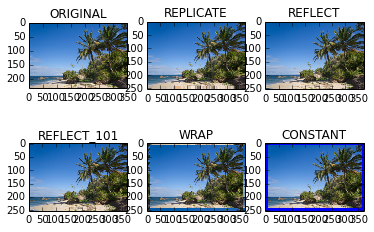

In [23]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

BLUE = (0,0,255)

img1 = beach ## no need to explicitly copy

replicate = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)

plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')